# **Dataset Used:** Capgemini Employee Reviews Dataset
https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset/

In [74]:
!pip install scikit-learn

In [75]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Capgemini_Employee_Reviews_from_AmbitionBox.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\nUn...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\nThere is...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


**Data Understanding**

In [76]:
# List different data types of features in the dataset
data.dtypes

Title                   object
Place                   object
Job_type                object
Department              object
Date                    object
Overall_rating         float64
work_life_balance      float64
skill_development      float64
salary_and_benefits    float64
job_security           float64
career_growth          float64
work_satisfaction      float64
Likes                   object
Dislikes                object
dtype: object

In [77]:
# Check for missing values in the dataset
data.isnull().sum()

Title                   1080
Place                   2396
Job_type               15437
Department              4910
Date                    1078
Overall_rating          1095
work_life_balance         16
skill_development         17
salary_and_benefits       46
job_security              50
career_growth             62
work_satisfaction         84
Likes                   3088
Dislikes                3955
dtype: int64

**Handling Missing Values**

In [78]:
# Handling missing values

# Filling 'Job_type' with 'Unknown'
data['Job_type'].fillna('Unknown', inplace=True)

# Filling rating columns with their median values
rating_columns = ['Overall_rating', 'work_life_balance', 'skill_development',
                  'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']

for column in rating_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Filling other columns with 'Not Provided'
other_columns = ['Title', 'Place', 'Department', 'Date', 'Likes', 'Dislikes']
data[other_columns] = data[other_columns].fillna('Not Provided')

data.isnull().sum()

Title                  0
Place                  0
Job_type               0
Department             0
Date                   0
Overall_rating         0
work_life_balance      0
skill_development      0
salary_and_benefits    0
job_security           0
career_growth          0
work_satisfaction      0
Likes                  0
Dislikes               0
dtype: int64

In [79]:
# Converting the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# After conversion, there might be some invalid date entries that got converted to NaT (Not a Timestamp).
# We'll handle these by replacing them with a placeholder date.
placeholder_date = data['Date'].dropna().mode()[0]  # Using the mode (most frequent date) as the placeholder
data['Date'].fillna(placeholder_date, inplace=True)

# Check the data types again to confirm the conversion
data.dtypes

Title                          object
Place                          object
Job_type                       object
Department                     object
Date                   datetime64[ns]
Overall_rating                float64
work_life_balance             float64
skill_development             float64
salary_and_benefits           float64
job_security                  float64
career_growth                 float64
work_satisfaction             float64
Likes                          object
Dislikes                       object
dtype: object

# **Exploratory Data Analysis (EDA)**

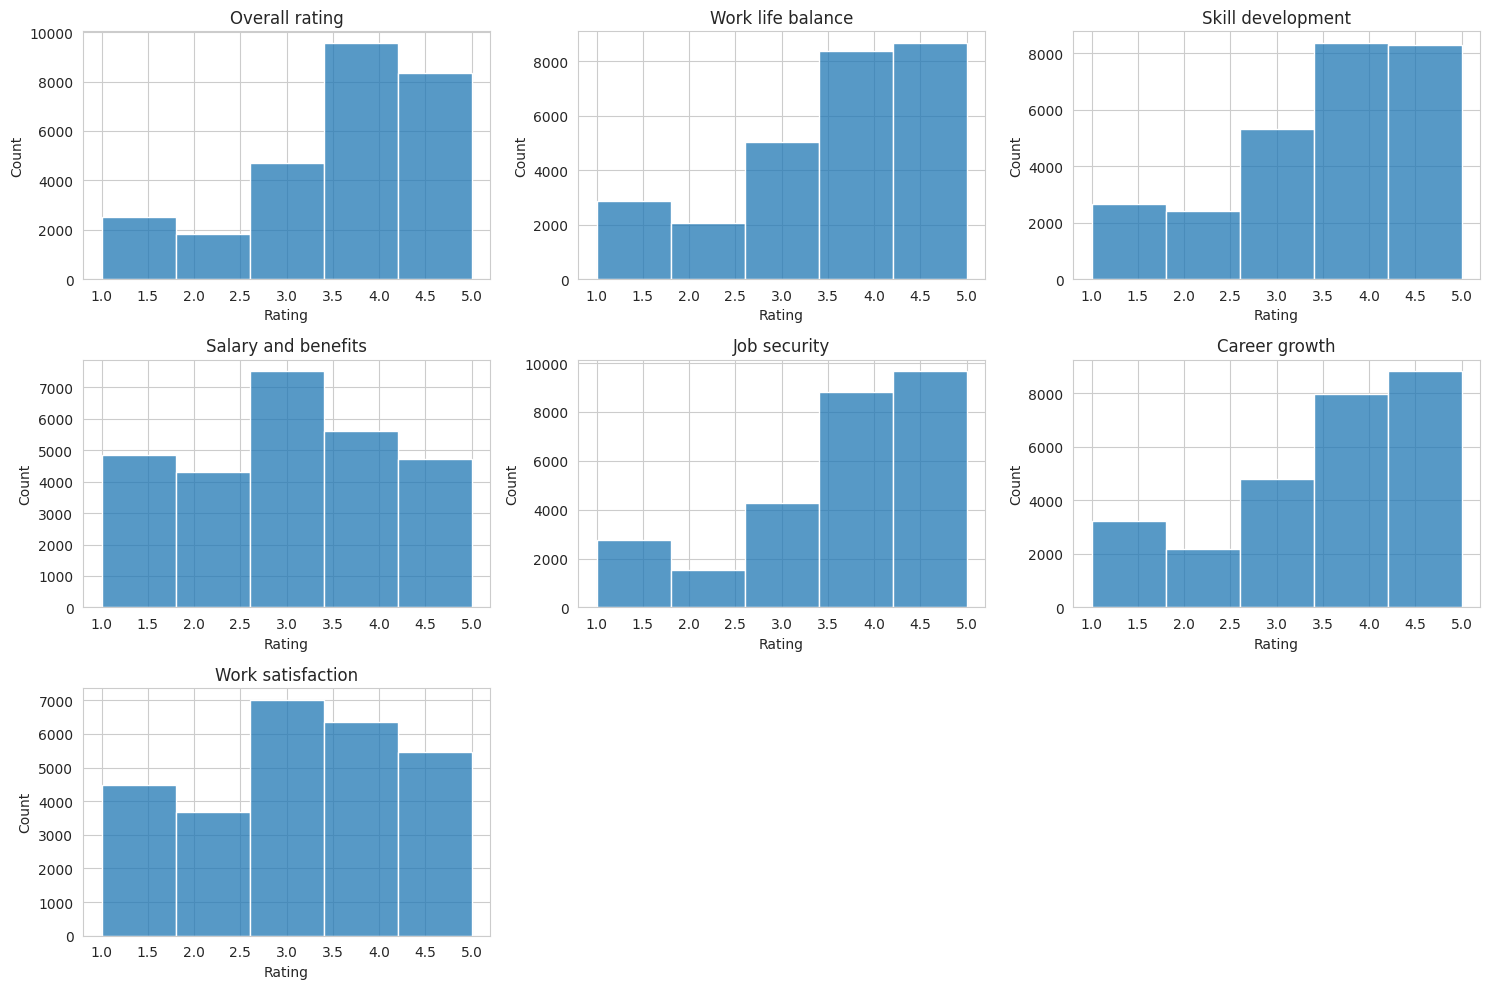

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plotting histograms for each rating column
for idx, column in enumerate(rating_columns, 1):
    plt.subplot(3, 3, idx)
    sns.histplot(data[column], kde=False, bins=5)
    plt.title(column.replace("_", " ").capitalize())
    plt.xlabel("Rating")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

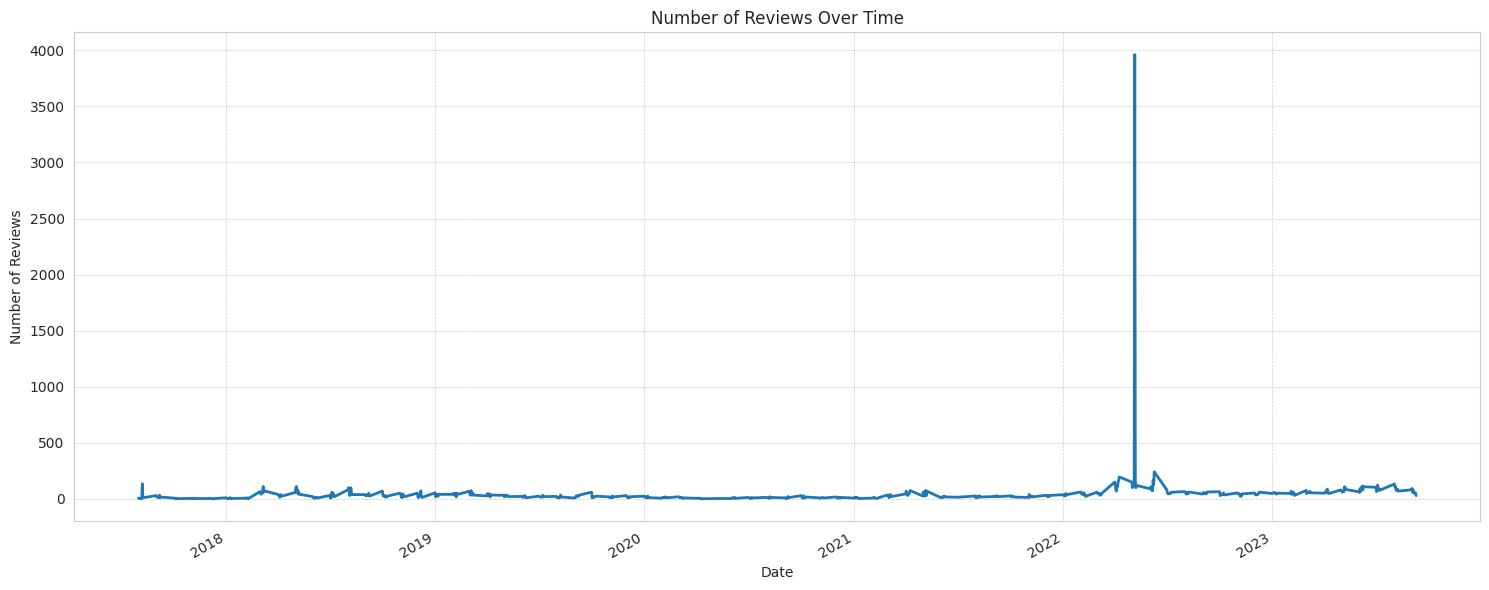

In [81]:
# Grouping data by 'Date' and counting the number of reviews on each date
reviews_over_time = data.groupby('Date').size()

# Plotting the distribution of reviews over time
plt.figure(figsize=(15, 6))
reviews_over_time.plot(lw=2)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

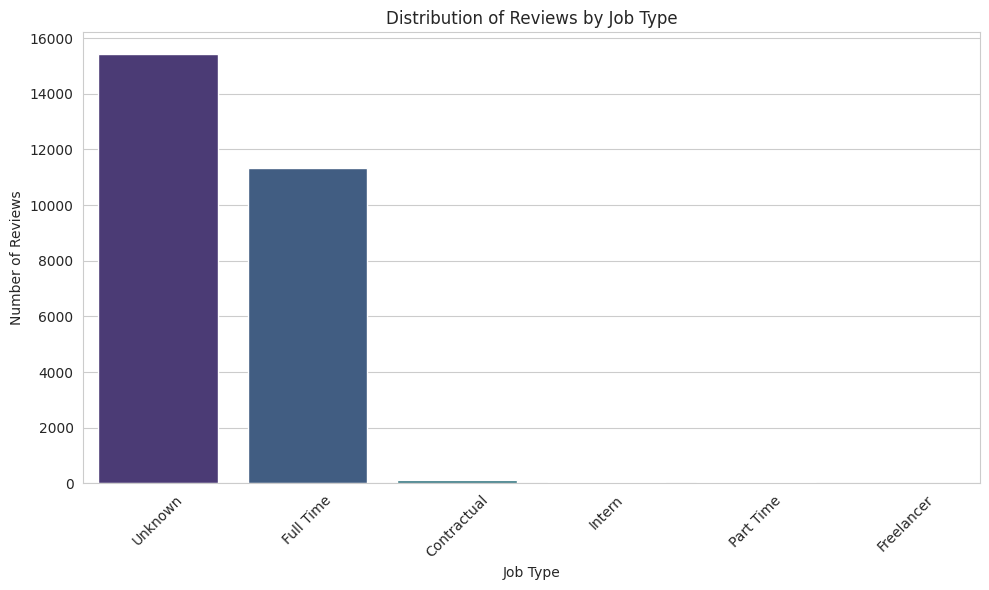

In [82]:
# Distribution of reviews across different Job_types
job_type_counts = data['Job_type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette="viridis")
plt.title('Distribution of Reviews by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

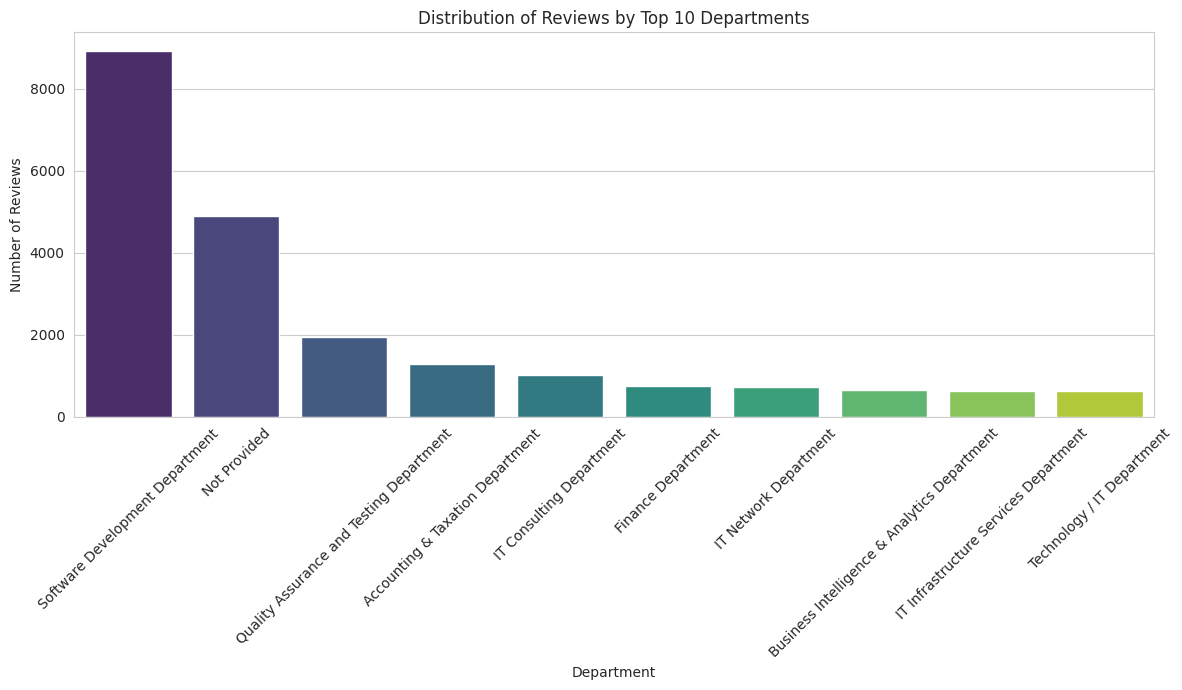

In [83]:
# Distribution of reviews across top 10 Departments
top_departments = data['Department'].value_counts().head(10)

# Plotting the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=top_departments.index, y=top_departments.values, palette="viridis")
plt.title('Distribution of Reviews by Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

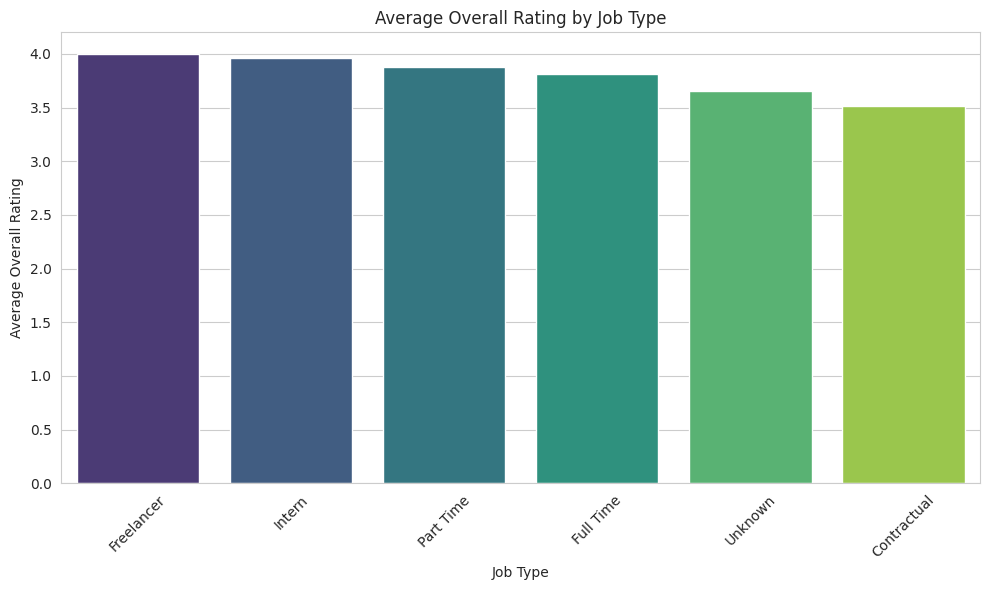

In [84]:
# Average overall rating for each Job_type
avg_rating_by_job_type = data.groupby('Job_type')['Overall_rating'].mean().sort_values(ascending=False)

# Plotting the average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_job_type.index, y=avg_rating_by_job_type.values, palette="viridis")
plt.title('Average Overall Rating by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

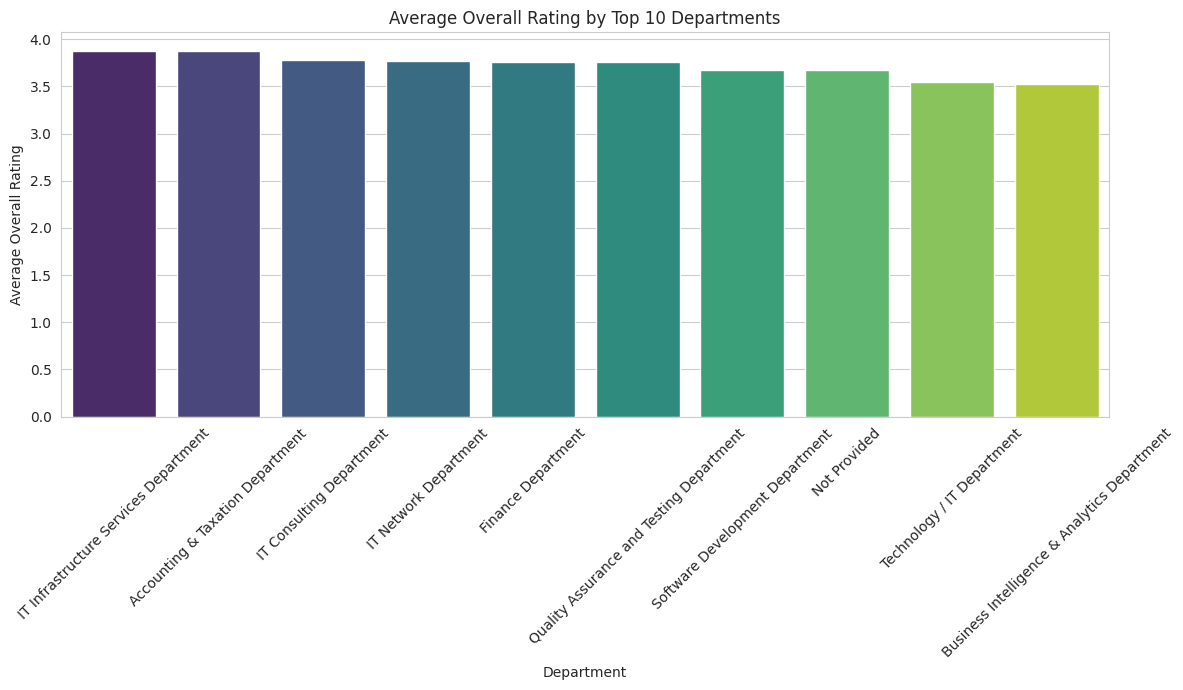

In [85]:
# Average overall rating for top 10 Departments
top_departments_list = top_departments.index.tolist()
avg_rating_by_department = data[data['Department'].isin(top_departments_list)]
avg_rating_by_department = avg_rating_by_department.groupby('Department')['Overall_rating'].mean().sort_values(ascending=False)

# Plotting the average ratings
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_by_department.index, y=avg_rating_by_department.values, palette="viridis")
plt.title('Average Overall Rating by Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Modeling**

In [86]:
## Feature Selection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting the features and target variable
features = ['Job_type', 'Department', 'work_life_balance', 'skill_development',
            'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']
X = data[features]
y = data['Overall_rating']

# One-Hot Encoding the categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features_updated = encoder.fit_transform(data[['Job_type', 'Department']])
encoded_df_updated = pd.DataFrame(encoded_features_updated, columns=encoder.get_feature_names_out(['Job_type', 'Department']))

# Selecting the original features and combining the encoded features with the rest of the features
X_updated = pd.concat([data[features].drop(columns=['Job_type', 'Department']), encoded_df_updated], axis=1)

# Verifying the updated encoding
X_updated.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Job_type_Freelancer,Job_type_Full Time,Job_type_Intern,Job_type_Part Time,...,Department_finance Department,Department_insights and data Department,Department_it Department,Department_it Department,Department_procurement Department,Department_quality Department,Department_rbc Department,Department_sPMO Department,Department_senior software engineer Department,Department_sr.Anaiyst Department
0,4.0,3.0,3.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,4.0,3.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,5.0,3.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,4.0,4.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.preprocessing import LabelEncoder

# Using label encoding for the 'Job_type' and 'Department' columns
label_encoders = {}

for column in ['Job_type', 'Department']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

y_reset_index = y.reset_index(drop=True)

# Selecting the features again and splitting into training and test sets
X_label_encoded = data[features]
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_label_encoded, y_reset_index, test_size=0.2, random_state=42)

X_train_le.shape, X_test_le.shape, y_train_le.shape, y_test_le.shape

((21594, 8), (5399, 8), (21594,), (5399,))

**Built a Baseline Model**

In [88]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Redefining the models and their names
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
decision_tree = DecisionTreeRegressor(max_depth=10)
baseline_model = LinearRegression()

models_le = [baseline_model, ridge, lasso, decision_tree]
model_names_le = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regressor"]

# Retraining the models using the label-encoded dataset and evaluating their performance
mse_values_le = []

for model in models_le:
    model.fit(X_train_le, y_train_le)
    y_pred = model.predict(X_test_le)
    mse_values_le.append(mean_squared_error(y_test_le, y_pred))

# Combining the results
model_comparison_le = pd.DataFrame({'Model': model_names_le, 'MSE': mse_values_le})

model_comparison_le


,Model,MSE
0,Linear Regression,0.663559
1,Ridge Regression,0.663559
2,Lasso Regression,0.675450
3,Decision Tree Regressor,0.722932


**Visualization of the residuals**

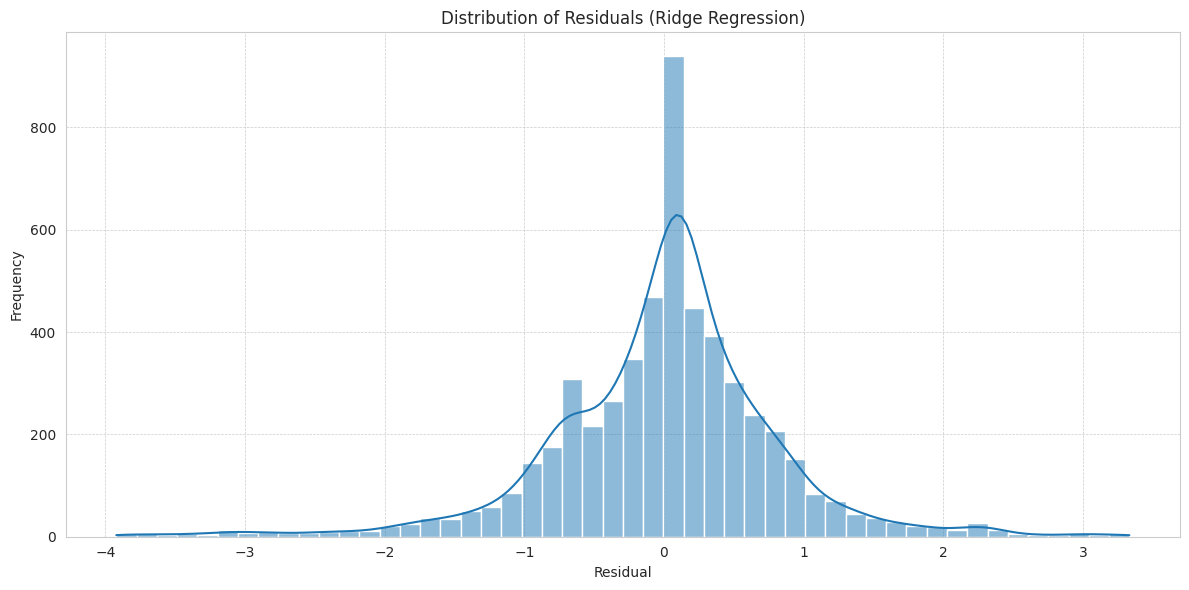

In [89]:
# Predicting using Ridge Regression on the test set
y_pred_ridge = ridge.predict(X_test_le)

# Calculating residuals
residuals = y_test_le - y_pred_ridge

# Plotting the residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals (Ridge Regression)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculating R-squared
r2 = r2_score(y_test_le, y_pred_ridge)

# Calculating RMSE
rmse = mean_squared_error(y_test_le, y_pred_ridge, squared=False)

# Calculating MAE
mae = mean_absolute_error(y_test_le, y_pred_ridge)

r2, rmse, mae

(0.5583765402674264, 0.8145916042004623, 0.5664802475488998)